<h1>SALES DATA ANALYSIS</h1>
<p>In this analysis, we are going to analyse a sales data from kaggle datasets. Our outcomes are : 
<ol>
    <li>Find the information about 5 first product category by a specific amount.</li>
    <li>Existing relation between : numerical columns.</li>
    <li>Make a visualisation to explain all of it</li>
    <li>Make Prediction</li>
</ol>
</p>
<p class = "Intro"> <h2>Step of the Analysis</h2></p>
<ol>
    <li>Import the important and necessary module and library for this Case Study</li>
    <li>Import the data into data frame</li>
    <li>Analyse the data
    <ul>
        <li>Check the shape of the Data</li>
        <li>All the columns of the Data</li>
        <li>Describe and Summarize the Data</li>
        <li>All info about the Data</li>
        <li>Data types of each columns</li>
        <li>Select all numerical column and categorical columns</li>
    </ul>
    </li>
    <li>  <h3>Data Cleaning and Processing</h3>
        <p>In this section, we perform the following steps:
        <ul>
        <li>Check for missing value in the Data</li>
        <li>Drop all missing value </li>
        <li>Convert the columns to the corect Data types</li>
        <li>Count the value in each column</li>
        <li>Group the Data into category if necessary
        </li>
        <li>Number of unique Data in columns</li>
            <li>Sort the Data if needed</li>
        <li>Convert all columns to the specific data types, we can use <i> <strong>dtypes</strong></i> to find the data type and <i> <strong>astype()</strong></i> to convert it to another data types.</li>
        <li>Remove "the unamed 0" column, . If required, covert Date columns into Datetime.</li>
        </ul> <br>
        It's important to note that many notebook creators may encounter issues when numeric values are stored as strings with commas or time and numeric data represent as object. Our approach using the str.replace method followed by pd.to_numeric is robust in handling such errors and pd.to_Datetime to convert into Date.
        </p>
    </li>
    <li><h3>Exploratory Data</h3>
    <ul>
        <h4>Visualize the Data.</h4>
    <li>Distribution per Category.</li>
    </ul>
    </li>
    <li>
        <h3>ML</h3>
        <ol>
            <li>Select Model</li>
            <li>Train, Test, and Predict from the model</li>
            <li>Find the Z score</li>
            <li>Mean Square Root</li>
            <li>Find the correlation between </li>
            <li>Visialize the result</li>
        </ol>
    </li>
    
    
</ol>


In [679]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [681]:
df = pd.read_csv("./Downloads/Sales Dataset.csv")

<h3>Inspect Data</h3>

In [684]:
#Read the first 10 rows of the Data
df.head(10)

,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,2023-11-24,Male,34,Beauty,3,50,150
1,1,2023-02-27,Female,26,Clothing,2,500,1000
2,2,2023-01-13,Male,50,Electronics,1,30,30
3,3,2023-05-21,Male,37,Clothing,1,500,500
4,4,2023-05-06,Male,30,Beauty,2,50,100
5,5,2023-04-25,Female,45,Beauty,1,30,30
6,6,2023-03-13,Male,46,Clothing,2,25,50
7,7,2023-02-22,Male,30,Electronics,4,25,100
8,8,2023-12-13,Male,63,Electronics,2,300,600
9,9,2023-10-07,Female,52,Clothing,4,50,200


In [686]:
#Get the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Gender            1000 non-null   object
 3   Age               1000 non-null   int64 
 4   Product Category  1000 non-null   object
 5   Quantity          1000 non-null   int64 
 6   Price per Unit    1000 non-null   int64 
 7   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 62.6+ KB


In [688]:
#Data shape
df.shape
f"This data has {df.shape[0]} rows and {df.shape[1]} columns."

'This data has 1000 rows and 8 columns.'

In [690]:
#Summarise the data
df.describe(include = "all")

,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000,1000.00000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,345,2,NaN,3,NaN,NaN,NaN
top,NaN,2023-05-16,Female,NaN,Clothing,NaN,NaN,NaN
freq,NaN,11,510,NaN,351,NaN,NaN,NaN
mean,499.500000,NaN,NaN,41.39200,NaN,2.514000,179.890000,456.000000
std,288.819436,NaN,NaN,13.68143,NaN,1.132734,189.681356,559.997632
min,0.000000,NaN,NaN,18.00000,NaN,1.000000,25.000000,25.000000
25%,249.750000,NaN,NaN,29.00000,NaN,1.000000,30.000000,60.000000
50%,499.500000,NaN,NaN,42.00000,NaN,3.000000,50.000000,135.000000
75%,749.250000,NaN,NaN,53.00000,NaN,4.000000,300.000000,900.000000


In [692]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Date,1000,345,2023-05-16,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1000,2,Female,510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1000.0,NaN,NaN,NaN,41.392,13.68143,18.0,29.0,42.0,53.0,64.0
Product Category,1000,3,Clothing,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,1000.0,NaN,NaN,NaN,2.514,1.132734,1.0,1.0,3.0,4.0,4.0
Price per Unit,1000.0,NaN,NaN,NaN,179.89,189.681356,25.0,30.0,50.0,300.0,500.0
Total Amount,1000.0,NaN,NaN,NaN,456.0,559.997632,25.0,60.0,135.0,900.0,2000.0


In [694]:
df.nunique()

Unnamed: 0          1000
Date                 345
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [696]:
df

,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,2023-11-24,Male,34,Beauty,3,50,150
1,1,2023-02-27,Female,26,Clothing,2,500,1000
2,2,2023-01-13,Male,50,Electronics,1,30,30
3,3,2023-05-21,Male,37,Clothing,1,500,500
4,4,2023-05-06,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...
995,995,2023-05-16,Male,62,Clothing,1,50,50
996,996,2023-11-17,Male,52,Beauty,3,30,90
997,997,2023-10-29,Female,23,Beauty,4,25,100
998,998,2023-12-05,Female,36,Electronics,3,50,150


<h3>Data Cleaning and Processing</h3>

In [699]:
#Select all numerical variable
num_col = df.select_dtypes(include= "number").columns.tolist()
num_data = df[num_col]

In [701]:
#Select all categorical variables
cat_col = df.select_dtypes(include= "object").columns.tolist()
cat_data = df[cat_col]

In [704]:
#Convert the Date columns to Datatimw
df["Date"] = pd.to_datetime(df["Date"])

In [706]:
#Add a new columns mean total amount
df["Mean_Total_Amount"] = df["Total Amount"].mean()

In [708]:
df

,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Mean_Total_Amount
0,0,2023-11-24,Male,34,Beauty,3,50,150,456.0
1,1,2023-02-27,Female,26,Clothing,2,500,1000,456.0
2,2,2023-01-13,Male,50,Electronics,1,30,30,456.0
3,3,2023-05-21,Male,37,Clothing,1,500,500,456.0
4,4,2023-05-06,Male,30,Beauty,2,50,100,456.0
...,...,...,...,...,...,...,...,...,...
995,995,2023-05-16,Male,62,Clothing,1,50,50,456.0
996,996,2023-11-17,Male,52,Beauty,3,30,90,456.0
997,997,2023-10-29,Female,23,Beauty,4,25,100,456.0
998,998,2023-12-05,Female,36,Electronics,3,50,150,456.0


In [710]:
#Check the number of unique data in each columns
df.nunique()

Unnamed: 0           1000
Date                  345
Gender                  2
Age                    47
Product Category        3
Quantity                4
Price per Unit          5
Total Amount           18
Mean_Total_Amount       1
dtype: int64

In [713]:
#Check for missing Data
df.isna().sum()

Unnamed: 0           0
Date                 0
Gender               0
Age                  0
Product Category     0
Quantity             0
Price per Unit       0
Total Amount         0
Mean_Total_Amount    0
dtype: int64

In [715]:
#Check for duplicated data
df.duplicated().sum()

0

In [717]:
#Count the value of each columns in the dataset has a frame
df.value_counts().to_frame()

,,,,,,,,,count
Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Mean_Total_Amount,
0,2023-11-24,Male,34,Beauty,3,50,150,456.0,1
671,2023-08-01,Female,34,Beauty,2,50,100,456.0,1
658,2023-03-19,Female,39,Electronics,1,30,30,456.0,1
659,2023-04-29,Female,38,Beauty,2,500,1000,456.0,1
660,2023-07-16,Female,44,Clothing,4,25,100,456.0,1
...,...,...,...,...,...,...,...,...,...
338,2023-03-03,Female,22,Electronics,2,25,50,456.0,1
339,2023-10-19,Female,36,Clothing,4,300,1200,456.0,1
340,2023-05-07,Male,31,Clothing,4,50,200,456.0,1


In [719]:
df.value_counts().sort_values(ascending = False).to_frame()

,,,,,,,,,count
Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Mean_Total_Amount,
0,2023-11-24,Male,34,Beauty,3,50,150,456.0,1
13,2023-01-17,Male,64,Clothing,4,30,120,456.0,1
30,2023-05-23,Male,44,Electronics,4,300,1200,456.0,1
29,2023-10-29,Female,39,Beauty,3,300,900,456.0,1
2,2023-01-13,Male,50,Electronics,1,30,30,456.0,1
...,...,...,...,...,...,...,...,...,...
994,2023-04-30,Female,41,Clothing,1,30,30,456.0,1
995,2023-05-16,Male,62,Clothing,1,50,50,456.0,1
996,2023-11-17,Male,52,Beauty,3,30,90,456.0,1


In [722]:
#Group data by product category and quantity. Sort the values
group_cat_qu = df.groupby("Product Category")["Quantity"].sum().sort_values(ascending = False)

In [724]:
group_cat_qu.to_frame()

,Quantity
Product Category,
Clothing,894
Electronics,849
Beauty,771


In [726]:
#Group data by product category and Total amount. Sort the values

group_cat_qu_2 = df.groupby("Product Category")["Total Amount"].sum().sort_values(ascending = False)

In [728]:
group_cat_qu_2.to_frame()

,Total Amount
Product Category,
Electronics,156905
Clothing,155580
Beauty,143515


In [730]:
#Group data by gender and quantity. Sort the values
group_gen_qu = df.groupby("Gender")["Quantity"].sum().sort_values(ascending = False)

In [732]:
group_gen_qu.to_frame()

,Quantity
Gender,
Female,1298
Male,1216


In [734]:
#Group data by gender, product category and quantity. Sort the values

group_gen_cat_qu = df.groupby(["Gender", "Product Category"])["Quantity"].sum().sort_values(ascending = False)

In [736]:
group_gen_cat_qu.to_frame()

Quantity
Gender Product Category          
Male   Clothing               453
Female Clothing               441
       Electronics            439
       Beauty                 418
Male   Electronics            410
       Beauty                 353

In [738]:
#Count the value of all Clothing category
clot_prod = df[df["Product Category"]=="Clothing"].value_counts()
clot_prod.to_frame()

,,,,,,,,,count
Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Mean_Total_Amount,
1,2023-02-27,Female,26,Clothing,2,500,1000,456.0,1
657,2023-03-12,Male,59,Clothing,1,25,25,456.0,1
679,2023-10-22,Female,53,Clothing,3,300,900,456.0,1
674,2023-08-04,Female,45,Clothing,2,30,60,456.0,1
673,2023-04-16,Female,38,Clothing,1,300,300,456.0,1
...,...,...,...,...,...,...,...,...,...
315,2023-04-22,Female,48,Clothing,2,25,50,456.0,1
314,2023-06-01,Male,47,Clothing,2,30,60,456.0,1
313,2023-04-08,Male,52,Clothing,4,30,120,456.0,1


In [740]:
#Count the value of all Electronics category
Elect_prod = df[df["Product Category"]=="Electronics"].value_counts()
Elect_prod.to_frame()

,,,,,,,,,count
Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Mean_Total_Amount,
2,2023-01-13,Male,50,Electronics,1,30,30,456.0,1
675,2023-07-19,Male,63,Electronics,3,500,1500,456.0,1
694,2023-08-12,Female,22,Electronics,3,50,150,456.0,1
693,2023-05-20,Female,39,Electronics,2,25,50,456.0,1
688,2023-10-07,Male,57,Electronics,2,50,100,456.0,1
...,...,...,...,...,...,...,...,...,...
346,2023-08-03,Male,42,Electronics,1,25,25,456.0,1
344,2023-11-14,Male,62,Electronics,1,30,30,456.0,1
342,2023-11-01,Male,21,Electronics,2,25,50,456.0,1


In [742]:
#Count the value of all Beauty category
Beauty_prod = df[df["Product Category"]=="Beauty"].value_counts()
Beauty_prod.to_frame()

,,,,,,,,,count
Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Mean_Total_Amount,
0,2023-11-24,Male,34,Beauty,3,50,150,456.0,1
643,2023-09-06,Male,23,Beauty,3,25,75,456.0,1
669,2023-10-05,Male,27,Beauty,1,30,30,456.0,1
668,2023-06-19,Male,24,Beauty,4,300,1200,456.0,1
661,2023-12-22,Male,48,Beauty,2,500,1000,456.0,1
...,...,...,...,...,...,...,...,...,...
310,2023-12-05,Female,32,Beauty,4,25,100,456.0,1
309,2023-10-12,Female,28,Beauty,1,25,25,456.0,1
308,2023-12-23,Female,26,Beauty,1,25,25,456.0,1


In [744]:
#Count the value of all Beauty category and Gender Male.

Male_and_Beauty = df[(df["Product Category"]=="Beauty") & (df["Gender"]=="Male")].value_counts()
Male_and_Beauty.to_frame()


,,,,,,,,,count
Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Mean_Total_Amount,
0,2023-11-24,Male,34,Beauty,3,50,150,456.0,1
738,2023-11-29,Male,36,Beauty,1,25,25,456.0,1
682,2023-01-04,Male,38,Beauty,2,500,1000,456.0,1
692,2023-04-23,Male,41,Beauty,3,500,1500,456.0,1
712,2023-01-14,Male,34,Beauty,3,25,75,456.0,1
...,...,...,...,...,...,...,...,...,...
259,2023-07-01,Male,28,Beauty,2,30,60,456.0,1
256,2023-02-19,Male,19,Beauty,4,500,2000,456.0,1
243,2023-12-09,Male,28,Beauty,2,50,100,456.0,1


In [746]:
group_age_qu = df.groupby("Age")["Quantity"].sum().sort_values(ascending = False)
group_age_qu.to_frame()

,Quantity
Age,
43,89
51,84
34,72
47,72
64,70
54,69
57,68
46,65
42,65


In [748]:
print("Sales quantity by age group:")
print(df.groupby('Age', observed=False)['Quantity'].sum())
print("\nSales revenue by age group:")
print(df.groupby('Age', observed=False)['Total Amount'].sum())
print("\nSales quantity by age group and product category:")

Sales quantity by age group:
Age
18    54
19    57
20    47
21    50
22    65
23    57
24    36
25    46
26    53
27    60
28    58
29    42
30    60
31    60
32    45
33    26
34    72
35    64
36    43
37    47
38    47
39    45
40    52
41    42
42    65
43    89
44    39
45    37
46    65
47    72
48    42
49    50
50    50
51    84
52    63
53    46
54    69
55    47
56    44
57    68
58    34
59    41
60    56
61    42
62    63
63    50
64    70
Name: Quantity, dtype: int64

Sales revenue by age group:
Age
18    11215
19    14870
20     8645
21    12585
22    13700
23     8220
24     5415
25     9900
26    13980
27     9385
28     8670
29     6570
30     9790
31    10220
32     5550
33     6240
34    16785
35    11290
36     9105
37    11650
38    11100
39     4595
40     9415
41     5650
42     8500
43    17970
44     7560
45     6325
46    13090
47    12505
48     7240
49     5110
50     9845
51    16065
52     7040
53     9510
54    10505
55     9780
56     9440
57     9290
58

<h3>VISUALIZATION</h3>

<Axes: >

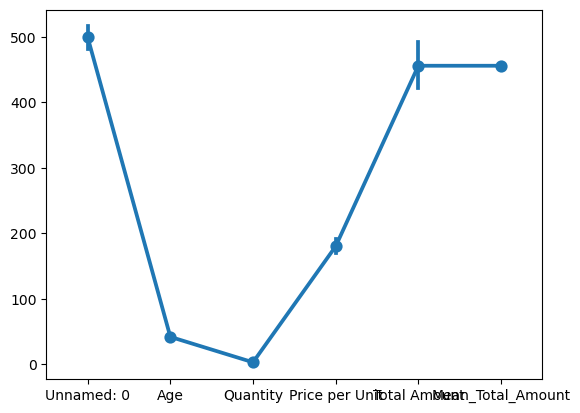

In [751]:
sns.pointplot(df)

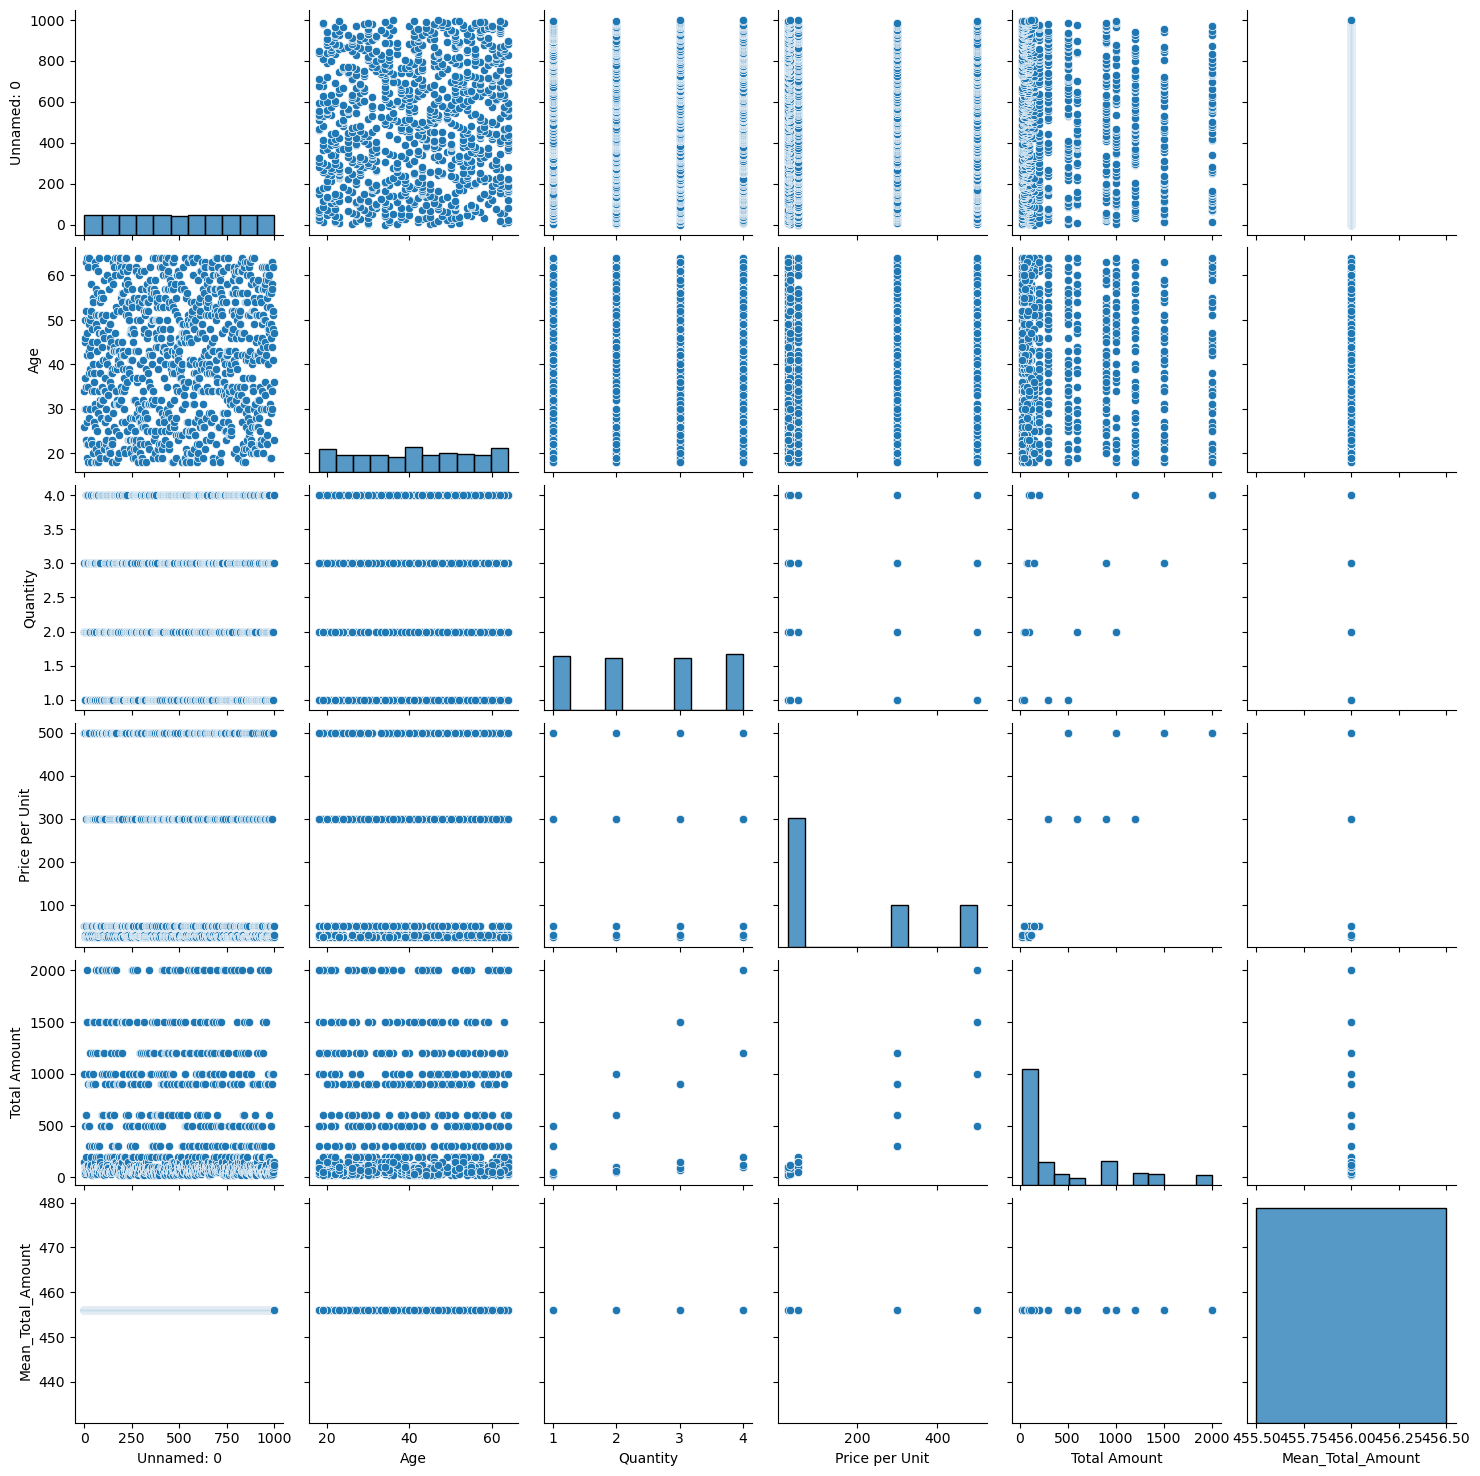

In [753]:
sns.pairplot(df)
plt.savefig("./Downloads/pairsales.png")

(-1.099999077555973,
 1.0999992208909009,
 -1.0999983979757049,
 1.0999999237131288)

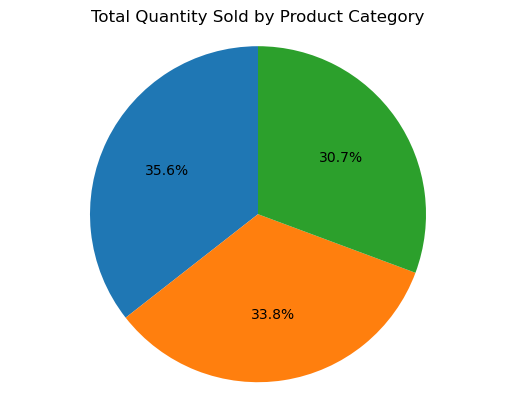

In [754]:
plt.pie(group_cat_qu, autopct='%1.1f%%',
    startangle=90)
plt.savefig("./Downloads/piesales.png")
plt.title('Total Quantity Sold by Product Category')
plt.axis('equal')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_29572\2739244396.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


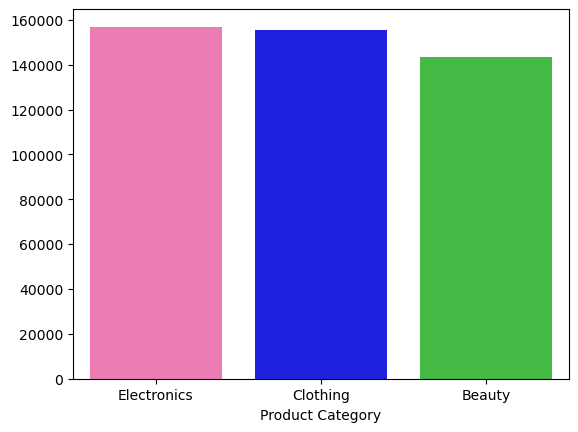

In [755]:
sns.barplot(
    x=df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).index,
    y=df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).values,
    palette = ["#FF69B4", "blue", "#32CD32"]
)
plt.savefig("./Downloads/barsales.png")

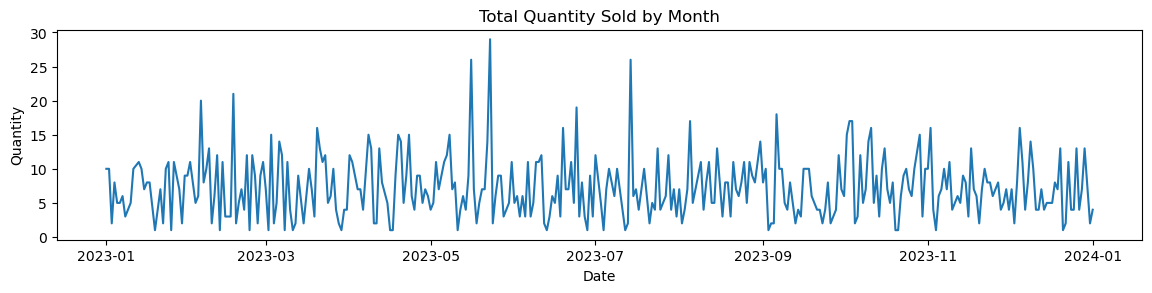

In [757]:
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
sns.lineplot(
    x=df.groupby('Date')['Quantity'].sum().sort_index().index,
    y=df.groupby('Date')['Quantity'].sum().sort_index().values
)
plt.title('Total Quantity Sold by Month')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.savefig("./Downloads/lineairsales.png")

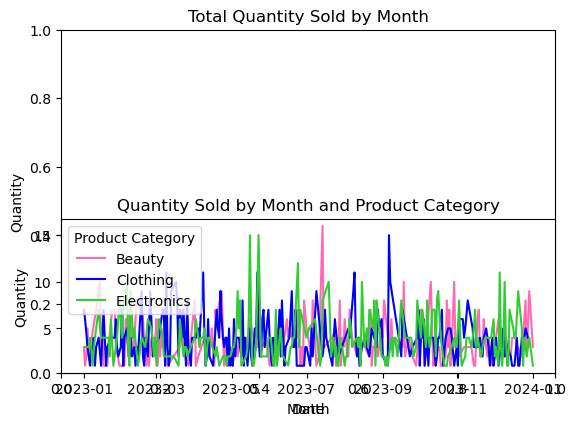

<Figure size 640x480 with 0 Axes>

In [758]:
plt.title('Total Quantity Sold by Month')
plt.xlabel('Date')
plt.ylabel('Quantity')

plt.subplot(2, 1, 2)
sns.lineplot(
    data=df,
    x='Date',
    y='Quantity',
    hue='Product Category',
    estimator='sum',
    errorbar=None,
    palette = ["#FF69B4", "blue", "#32CD32"]
)

plt.title('Quantity Sold by Month and Product Category')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend(title='Product Category', loc = "upper left")

plt.tight_layout()
plt.show()
plt.savefig("./Downloads/compllinessales.png")

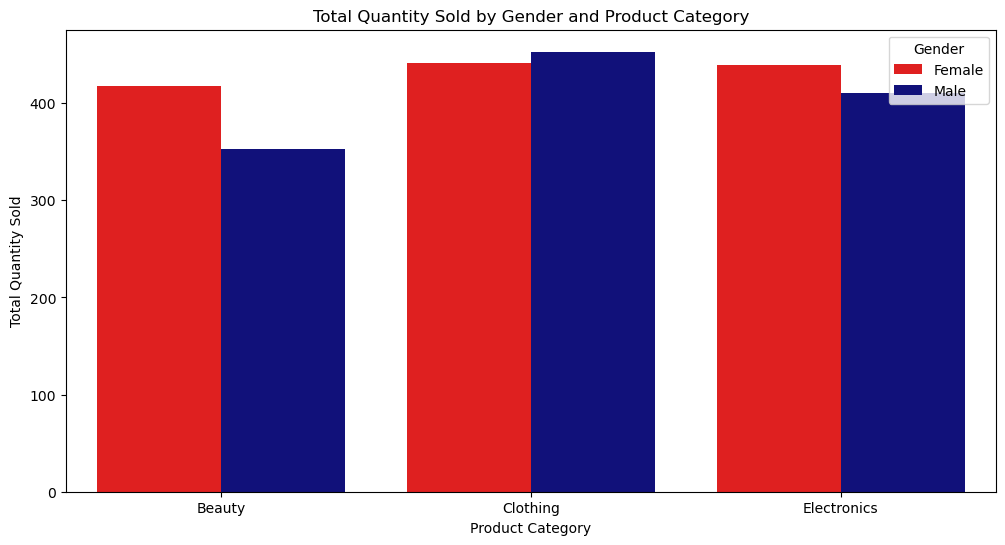

In [759]:
plt.figure(figsize=(12,6))

sns.barplot(
    data=df.groupby(['Gender', 'Product Category'])['Quantity'].sum().reset_index(),
    x='Product Category',
    y='Quantity',
    hue='Gender',
    palette={'Female': 'red', 'Male': 'darkblue'}
)

plt.title('Total Quantity Sold by Gender and Product Category')
plt.ylabel('Total Quantity Sold')
plt.xlabel('Product Category')
plt.legend(title='Gender')
plt.savefig("./Downloads/barcatsales.png")

In [760]:
colors = {
    'Beauty': '#FF69B4',
    'Clothing': '#32CD32',
    'Electronics': '#1E90FF'
}

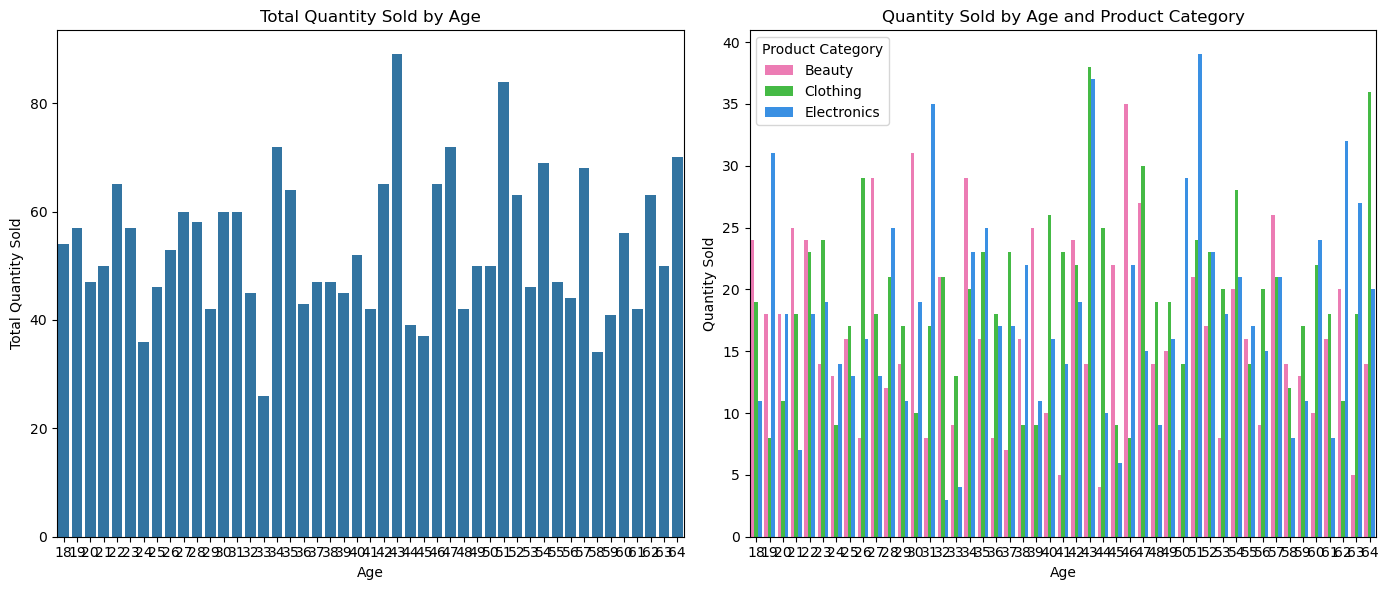

<Figure size 640x480 with 0 Axes>

In [761]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(
    data=df.groupby('Age')['Quantity'].sum().reset_index(),
    x='Age',
    y='Quantity'
)
plt.title('Total Quantity Sold by Age')
plt.xlabel('Age')
plt.ylabel('Total Quantity Sold')

plt.savefig("./Downloads/bawercatsales.png")
plt.subplot(1, 2, 2)
sns.barplot(
    data=df.groupby(['Age', 'Product Category'])['Quantity'].sum().reset_index(),
    x='Age',
    y='Quantity',
    hue='Product Category',
    palette = colors
)
plt.title('Quantity Sold by Age and Product Category')
plt.xlabel('Age')
plt.ylabel('Quantity Sold')
plt.legend(title='Product Category')

plt.tight_layout()
plt.show()
plt.savefig("./Downloads/bffrarcatsales.png")


In [762]:
sns.heatmap(num_col.corr(), annot= True)
plt.title("'Correlation Heatmap of Numeric Data'")
plt.savefig("./Downloads/corrheatmapsales.png")

AttributeError: 'list' object has no attribute 'corr'

In [ ]:
# Histogram for Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()
plt.savefig("./Downloads/agedist.png")

# Pie chart / Count plot for Product Categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product Category', color="green")
plt.title('Count of Sales per Product Category')
plt.xticks(rotation=45)
plt.show()
plt.savefig("./Downloads/productdistpiee.png")


In [ ]:
# Box plot for Total Amount by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Total Amount')
plt.title('Total Amount by Gender')
plt.show()
plt.savefig("./Downloads/genderbox.png")
# Violin plot for Total Amount by Product Category
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Product Category', y='Total Amount')
plt.title('Total Amount Distribution by Product Category')
plt.xticks(rotation=45)
plt.show()
plt.savefig("./Downloads/violinplot.png")

<h3>ML : Machine Learning Model</h3>

In [ ]:
#Select the columns as features
features = df.columns.tolist()
features

In [ ]:
#Choose the X and y 
X = df[["Age","Quantity"]]
y = df["Price per Unit"]

In [ ]:
#Choose the model
reg =LinearRegression()

In [ ]:
#Fit the model
reg.fit(X,y)

In [ ]:
#Train test and split the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Fit them
reg.fit(X_train, y_train)

In [768]:
#Make a prediction of X_test
predi = reg.predict(X_test)
predi

array([178.10636946, 175.52532053, 163.87182866, 185.97967677,
       204.88059959, 199.27540301, 157.06749644, 186.55293603,
       171.61497544, 171.74513597, 198.5193661 , 170.98909906,
       174.01324671, 164.62786557, 165.38390248, 190.64605878,
       197.32023046, 186.86587422, 188.37794804, 198.07626737,
       182.64259093, 195.80815664, 194.73918153, 179.30550509,
       181.13051711, 159.33560718, 170.98909906, 190.20296006,
       180.68741839, 195.49521845, 168.40805013, 171.43219778,
       175.83825872, 173.88308617, 185.04086221, 178.86240637,
       176.90723382, 182.01671456, 159.33560718, 190.20296006,
       184.46760295, 167.96495141, 171.30203725, 176.90723382,
       204.88059959, 191.27193516, 181.26067764, 185.04086221,
       158.13647154, 170.98909906, 169.16408704, 189.89002187,
       195.05211972, 171.43219778, 163.11579174, 185.97967677,
       179.74860382, 189.13398496, 180.68741839, 163.11579174,
       176.28135744, 195.80815664, 169.47702523, 191.27

In [770]:
#Find the R2 Score
score = r2_score(y_test, predi)
print('R² score of the Linear Regression model:', score)

R² score of the Linear Regression model: -0.015045562447196126


<h4>Visualise the ML</h4>

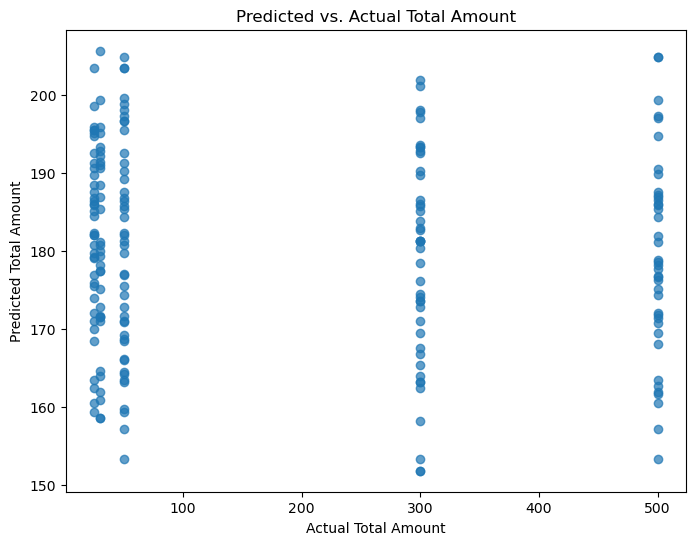

<Figure size 640x480 with 0 Axes>

In [773]:
# Plot predicted versus actual Total Amount values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predi, alpha=0.7)
plt.xlabel('Actual Total Amount')
plt.ylabel('Predicted Total Amount')
plt.title('Predicted vs. Actual Total Amount')
plt.show()
plt.savefig("./Downloads/predictActualamount.png")

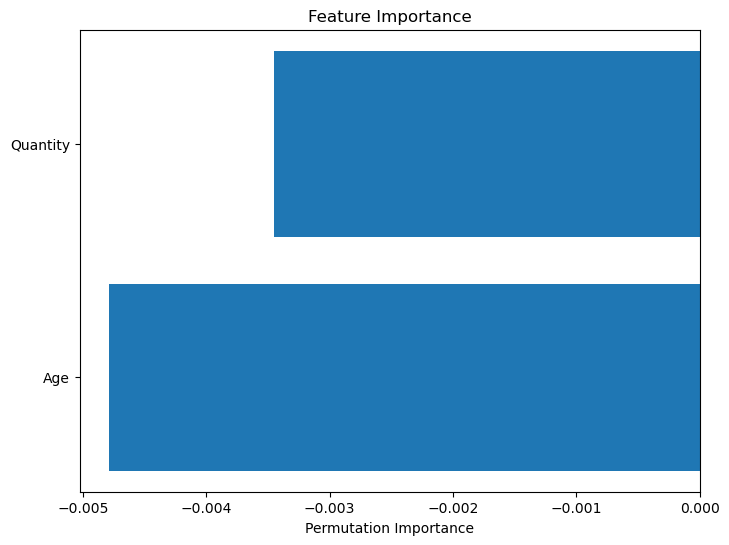

<Figure size 640x480 with 0 Axes>

In [775]:
from sklearn.inspection import permutation_importance

result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance')
plt.show()
plt.savefig("./Downloads/feature importance.png")

In [777]:
num_data

,Unnamed: 0,Age,Quantity,Price per Unit,Total Amount
0,0,34,3,50,150
1,1,26,2,500,1000
2,2,50,1,30,30
3,3,37,1,500,500
4,4,30,2,50,100
...,...,...,...,...,...
995,995,62,1,50,50
996,996,52,3,30,90
997,997,23,4,25,100
998,998,36,3,50,150


In [779]:
#The first quartile
iq1 = np.percentile(num_data["Quantity"],25)
f"The first quatile of the quantity columns is : {iq1}."

'The first quatile of the quantity columns is : 1.0.'

In [781]:
#Find the third quatiles
iq3 = np.percentile(num_data["Quantity"],75)
f"The third quatile of the quantity columns is : {iq3}."

'The third quatile of the quantity columns is : 4.0.'

In [783]:
#IQR
IQR = iq3 - iq1

In [785]:
IQR

3.0

In [787]:
num_data["Quantity"].describe()

count    1000.000000
mean        2.514000
std         1.132734
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Quantity, dtype: float64

In [789]:
upper = iq3 + 1.5*IQR
lower = iq1 - 1.5*IQR

In [791]:
upper

8.5

In [793]:
lower

-3.5

In [795]:
df.to_csv("./Downloads/Salescleandata.csv")

<h2>
    Author : 
     <h6>WEDSON PETIT HOMME </h6>
    <br>
    <h4> Contact :</h4>
    <li>Email : wedsonpetithomme0@gmail.com</li>
    <li> <a href = "https://www.linkedin.com/"> Linkedin :</a><a href = "https://www.linkedin.com/in/wedson-petithomme-947571239/">wedson-petit-homme-947571239 </a></li>
    <li><a href = "https://github.com/ALYProdz">GitHub :</a><a href = "https://github.com/ALYProdz">Wedson (ALYProdz) </a> </li>
    <li><a href = "https://x.com/"> X(Twitter) :</a> @WedsonPh97</li>
    <li><a href = https://www.datacamp.com/portfolio/wedsonpetithomme> Datacamp :</a><a href = "https://www.datacamp.com/portfolio/wedsonpetithomme"> WEDSON PETIT HOMME</a></li>
</h2>
